# Лабораторная работа 6. Метод квазиэквивалентного укрупнения состояний многомерных марковских процессов размножения-гибели

## Задание 1.

$K$ программистов могут писать программы для выполнения на одном из $M$ серверов, при этом программа не попадает сразу на сервер, а обрабатывается на одном из $N$ специальных компьютеров, которые проверяют отсутствие вирусов. 

Интенсивность работы программистов $\lambda$, интенсивность работы компьютеров-антивирусов $\nu$, интенсивность работы основных серверов $\mu$, программа оказывается с вирусом с вероятностью $p$. Если программа с вирусом, она получает отказ обслуживания на основных серверах. Для компьютеров по проверке вирусов имеется ограничение по длине очереди $m_1$, для основных серверов ограничение по длине очереди $m_2$.

- Нарисовать граф состояний системы, учитывая количество программистов, которые пишут программу, количество программ на компьютерах-антивирусах, количество программ на серверах;
- Написать уравнения Колмогорова для вероятностей состояний, финальных вероятностей;
- Тремя способами (экспериментально, методом укрупнения состояний, по уравнениям Колмогорова) найти основные характеристики эффективности СМО: 
  - среднее время пребывания заявки в системе, 
  - абсолютную пропускную способность, 
  - среднее число заявок в системе.

In [16]:
Variant<-8
set.seed(Variant) 
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
View(data.frame(K,N,M,m1,m2,lambda,mu,nu,p))

K,N,M,m1,m2,lambda,mu,nu,p
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,2,2,1,0.6518713,0.3215092,0.7189275,0.2908734


Представим граф состояний для данной системы:

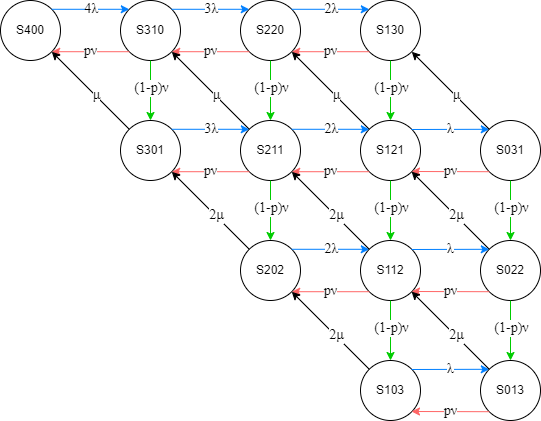

Состояния системы записываются в виде $ S_{ijk} $, где $S$ — состояние системы, $i$ — количество пишущихся программистами программ, $j$ — количество программ, проверяющихся на наличие вирусов или находящихся в очереди на данную проверку, $k$ — количество программ, обрабатывающихся серверами или находящихся в очереди на обработку.

Составим дифференциальные уравнения Колмогорова для вероятностей нахождения системы в заданных состояниях в зависимости от времени:

$$\frac{dP_{400}(t)}{dt}=-4 \lambda \cdot P_{400} + p \nu \cdot P_{310} + \mu \cdot P_{301}$$

$$\frac{dP_{310}(t)}{dt}=-(3 \lambda + \nu) \cdot P_{310} + 4 \lambda \cdot P_{400} + p \nu \cdot P_{220} + \mu \cdot P_{211}$$

$$\frac{dP_{220}(t)}{dt}=-(2 \lambda + \nu) \cdot P_{220} + 3 \lambda \cdot P_{310} + p \nu \cdot P_{130} + \mu \cdot P_{121}$$

$$\frac{dP_{130}(t)}{dt}=-\nu \cdot P_{130} + 2 \lambda \cdot P_{220} + \mu \cdot P_{031}$$

$$\frac{dP_{301}(t)}{dt}=-(3 \lambda + \mu) \cdot P_{301} + p \nu \cdot P_{211} + (1-p) \cdot \nu \cdot P_{310} + 2 \mu \cdot P_{202}$$

$$\frac{dP_{211}(t)}{dt}=-(2 \lambda + \nu + \mu) \cdot P_{211} + 3 \lambda \cdot P_{301} + p \nu \cdot P_{121} + (1-p) \cdot \nu \cdot P_{220} + 2 \mu \cdot P_{112}$$

$$\frac{dP_{121}(t)}{dt}=-(\lambda + \nu + \mu) \cdot P_{121} + 2 \lambda \cdot P_{211} + p \nu \cdot P_{031} + (1-p) \cdot \nu \cdot P_{130} + 2 \mu \cdot P_{022}$$

$$\frac{dP_{031}(t)}{dt}=-(\nu + \mu) \cdot P_{031} + \lambda \cdot P_{121}$$

$$\frac{dP_{202}(t)}{dt}=-(2 \lambda + 2 \mu) \cdot P_{202} + p \nu \cdot P_{112} + (1-p) \cdot \nu \cdot P_{211} + 2 \mu \cdot P_{103}$$

$$\frac{dP_{112}(t)}{dt}=-(\lambda + \nu + 2 \mu) \cdot P_{112} + 2 \lambda \cdot P_{202} + p \nu \cdot P_{022} + (1-p) \cdot \nu \cdot P_{121} + 2 \mu \cdot P_{013}$$

$$\frac{dP_{022}(t)}{dt}=-(\nu + 2 \mu) \cdot P_{022} + \lambda \cdot P_{112} + (1-p) \cdot \nu \cdot P_{031}$$

$$\frac{dP_{103}(t)}{dt}=-(\lambda + 2 \mu) \cdot P_{103} + p \nu \cdot P_{013} + (1-p) \cdot \nu \cdot P_{112}$$

$$\frac{dP_{013}(t)}{dt}=-(p\nu + 2 \mu) \cdot P_{013} + \lambda \cdot P_{103} + (1-p) \cdot \nu \cdot P_{022}$$

Учтем уравнение нормировки:

$$ P_{400}+P_{310}+P_{220}+P_{130}+P_{301}+P_{211}+P_{121}+P_{031}+P_{202}+P_{112}+P_{022}+P_{103}+P_{013} = 1 $$

Найдем в Maksima численные значения финальных вероятностей:

```
lambda:0.6518713$ mu:0.3215092$ nu:0.7189275$ p:0.2908734$
solutions:solve(
  [
    -4*lambda*P_400 + p*nu*P_310 + mu*P_301=0,
    -(3*lambda + nu)*P_310 + 4*lambda*P_400 + p*nu*P_220 + mu*P_211=0,
    -(2*lambda + nu)*P_220 + 3*lambda*P_310 + p*nu*P_130 + mu*P_121=0,
    -nu*P_130 + 2*lambda*P_220 + mu*P_031=0,
    -(3*lambda + mu)*P_301 + p*nu*P_211 + (1-p)*nu*P_310 + 2*mu*P_202=0,
    -(2*lambda + nu + mu)*P_211 + 3*lambda*P_301 + p*nu*P_121 + (1-p)*nu*P_220 + 2*mu*P_112=0,
    -(lambda + nu + mu)*P_121 + 2*lambda*P_211 + p*nu*P_031 + (1-p)*nu*P_130 + 2*mu*P_022=0,
    -(nu + mu)*P_031 + lambda*P_121=0,
    -(2*lambda + 2*mu)*P_202 + p*nu*P_112 + (1-p)*nu*P_211 + 2*mu*P_103=0,
    -(lambda + nu + 2*mu)*P_112 + 2*lambda*P_202 + p*nu*P_022 + (1-p)*nu*P_121 + 2*mu*P_013=0,
    -(nu + 2*mu)*P_022 + lambda*P_112 + (1-p)*nu*P_031=0,
    -(lambda + 2*mu)*P_103 + p*nu*P_013 + (1-p)*nu*P_112=0,
    -(p*nu + 2*mu)*P_013 + lambda*P_103 + (1-p)*nu*P_022=0,
    P_400+P_310+P_220+P_130+P_301+P_211+P_121+P_031+P_202+P_112+P_022+P_103+P_013=1
  ],
  [P_400,P_310,P_220,P_130,P_301,P_211,P_121,P_031,P_202,P_112,P_022,P_103,P_013]
)$
float(solutions);
```
Примечание: Maxima не справилась с решением задачи при большой точности коэффициентов $\lambda, \mu, \nu, p$, поэтому они были округлены до десятитысячных.

Получим результат:

```
P_400=0.004773899430407928,
P_310=0.01868883290626207,
P_220=0.05724350058247483,
P_130=0.1462335434470274,
P_301=0.02656735695185145,
P_211=0.07953228058901052,
P_121=0.1513706404557018,
P_031=0.09484671329591698,
P_202=0.05341226776744313,
P_112=0.1145436779917376,
P_022=0.09033558998080012,
P_103=0.0614119743039291,
P_013=0.101039722297437
```

Убедимся, что сумма финальных вероятностей действительно равна единице:

In [17]:
sum(
  0.004773899430407928,
  0.01868883290626207,
  0.05724350058247483,
  0.1462335434470274,
  0.02656735695185145,
  0.07953228058901052,
  0.1513706404557018,
  0.09484671329591698,
  0.05341226776744313,
  0.1145436779917376,
  0.09033558998080012,
  0.0614119743039291,
  0.101039722297437
)

[1] 1

Определение характеристик по уравнениям Колмогорова:

  - Среднее число заявок в системе:
  $$L_{сист} = \sum_{i=1}^4 (4-i) * P_{i,4-i,0} + \sum_{i=0}^3 (4-i) * P_{i,3-i,1} + \sum_{i=0}^2 (4-i) * P_{i,2-i,2} + \sum_{i=0}^1 (4-i) * P_{i,1-i,3}$$
    - Абсолютная пропускная способность системы: 
  $$\lambda' =  \lambda \cdot (1 - P_{отк})$$
$$P_{отк}=P_{130} $$
$$ \lambda'  = \lambda \cdot (1 - P_{130}) $$
  - Среднее время пребывания заявки в системе:
  $$T_{сист} = \frac{L_{сист}}{\lambda'}$$


In [18]:
P_400=0.004773899430407928
P_310=0.01868883290626207
P_220=0.05724350058247483
P_130=0.1462335434470274

P_301=0.02656735695185145
P_211=0.07953228058901052
P_121=0.1513706404557018
P_031=0.09484671329591698

P_202=0.05341226776744313
P_112=0.1145436779917376
P_022=0.09033558998080012

P_103=0.0614119743039291
P_013=0.101039722297437

Lsist <- 1*P_310 + 2*P_220 + 3*P_130 + 1*P_301 + 2*P_211 + 3*P_121 + 4*P_031 + 2*P_202 + 3*P_112 + 4*P_022 + 3*P_103 + 4*P_013
lambda1 <- lambda * (1 - P_130)
Tsist <- Lsist / lambda1

printf <- function(...)print(sprintf(...))

printf("Абсолютная пропускная способность %f", lambda1)
printf("Среднее число заявок в системе %f", Lsist)
printf("Среднее время нахождения заявок в системе %f", Tsist)

[1] "Абсолютная пропускная способность 0.556546"
[1] "Среднее число заявок в системе 2.991200"
[1] "Среднее время нахождения заявок в системе 5.374579"


Определение характеристик методом укрупнения состояний:

Декомпозируем систему на две модели:

- В первой модели совокупность серверов и компьютеров по проверке наличия вирусов заменим только одним обобщенный параметром - интенсивностью обслуживания $\mu_{общ}$. Такая модель будет обычной моделью рождения-гибели для замкнутой системы:

TODO: Возможно, здесь только до S3, поскольку существует очередь. Хотя, не факт...

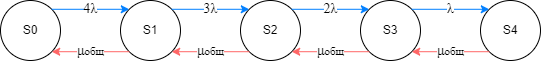

- Во второй модели будем считать, что в системе постоянно циркулируют $L_{сист}$ заявок. В качестве состояний системы возьмем количество заявок, обрабатываемых на основных серверах:

Определение характеристик экспериментально:

In [27]:
numOfProgs <- 4                # количество программистов
numOfComps <- 1                # количество компьютеров
numOfServs <- 2                # количество серверов
maxQueueLenComps <- 2               # максимальная длина очереди к компьютерам
maxQueueLenServs <- 1               # максимальная длина очереди к серверам
lambda <- 0.6518713   # интенсивность поступления программ на сервер
mu <- 0.3215092       # интенсивность обработки программы сервером
nu <- 0.7189275       # интенсивность проверки программы на вирус
p <- 0.2908734        # вероятность наличия вируса в программе

In [59]:
N <- 10000

curTime <- 0                     # текущее время симуляции
dt <- 0.01                       # тик (Дельта времени)

progSendAt <- rexp(numOfProgs, lambda)   # моменты времени, в которые программисты отправляют свои программы
progReceiveAt <- double(numOfProgs)      # моменты времени, в которые программисты получают ответ от сервера
progWaits <- integer(numOfProgs)         # флаг ожидания программистом ответа от сервера

qComputers <- c()               # очередь к компьютерам (ID программистов)
qServers <- c()                 # очередь к серверам (ID программистов)

progComputers <- c()            # компьютеры, занятые проверкой программ на вирусы (длительности проверки)
progServers <- c()              # сервера, занятые обработкой программ (длительности обработки)
progIDComputers <- c()          # ID программистов, программы которых проверяются на компьютерах (progIDComputers[i] 1 к 1 с progComputers[i])
progIDServers <- c()            # ID программистов, программы которых исполняются на серверах (progIDServers[i] 1 к 1 с progServers[i])

# Статистические параметры
numOfReqs <- 0                  # количество заявок, поступивших в систему
numOfSuccessfulReqs <- 0        # количество успешно обработанных заявок
LsystTotal <- 0                 # суммарное число запросов в системе
spentTimeInSystemTotal <- 0     # суммарное время нахождения успешно обработанных заявок в системе

for (i in 1:N) {
  curTime <- curTime + dt

  LsystTotal <- LsystTotal + length(qComputers) + length(qServers) + length(progComputers) + length(progServers)

  for (j in 1:numOfProgs) {
    if (progWaits[j] == 1) {
      if (progReceiveAt[j] != 0 && curTime >= progReceiveAt[j]) {
        numOfSuccessfulReqs <- numOfSuccessfulReqs + 1
        spentTimeInSystem <- progReceiveAt[j] - progSendAt[j]
        spentTimeInSystemTotal <- spentTimeInSystemTotal + spentTimeInSystem
        progSendAt[j] <- curTime + rexp(1, lambda)
        progReceiveAt[j] <- 0
        progWaits[j] <- 0
      }
    } else if (curTime >= progSendAt[j]) {
      numOfReqs <- numOfReqs + 1
      progWaits[j] <- 1
      if (length(progComputers) < numOfComps) {
        checkDuration <- rexp(1, nu) # время проверки программы на вирус
        progComputers <- append(progComputers, checkDuration)
        progIDComputers <- append(progIDComputers, j)
      } else {
        if (length(qComputers) < maxQueueLenComps) {
          qComputers <- append(qComputers, j)
        } else {
          progSendAt[j] <- curTime + rexp(1, lambda)
          progReceiveAt[j] <- 0
          progWaits[j] <- 0
        }
      }
    }
  }

  # Проверка программ на компьютерах
  j <- 1
  arrLen <- length(progComputers)
  while (j <= arrLen) {
    progComputers[j] <- progComputers[j] - dt
    if (progComputers[j] <= 0) {                                                # компьютер проверен программу на вирус
      programerID <- progIDComputers[j]
      if (runif(1) <= p) {                                                      # вирус обнаружен
        progSendAt[programerID] <- curTime + rexp(1, lambda)
        progReceiveAt[programerID] <- 0
        progWaits[programerID] <- 0
      } else {                                                                  # вирус не обнаружен, отправка программы на сервера
          handleDuration <- rexp(1, mu)                                         # время обработки программы       TODO: Возможно, более корректно ещё прибавлять dt
          if (length(progServers) < numOfServs) {
            progServers <- append(progServers, handleDuration)
            progIDServers <- append(progIDServers, programerID)
          } else {
              if (length(qServers) < maxQueueLenServs) {
                  qServers <- append(qServers, programerID)
              } else {
                progSendAt[programerID] <- curTime + rexp(1, lambda)
                progReceiveAt[programerID] <- 0
                progWaits[programerID] <- 0
              }
          }
      }
      progComputers <- progComputers[-j]
      progIDComputers <- progIDComputers[-j]
      arrLen <- arrLen - 1
    } else {
      j <- j + 1
    }
  }

  # Забор программ из очереди к компьютерам
  if (length(progComputers) < numOfComps && length(qComputers) > 0) {
    jMax <- min(c(length(qComputers), numOfComps - length(progComputers)))
    for (j in (1:jMax)) {
      qHead <- qComputers[1]
      checkDuration <- rexp(1, nu)
      progComputers <- append(progComputers, checkDuration)
      progIDComputers <- append(progIDComputers, qHead)
      qComputers <- qComputers[-1]
    }
  }

  # Проверка программ на серверах
  j <- 1
  arrLen <- length(progServers)
  while (j <= arrLen) {
    progServers[j] <- progServers[j] - dt
    if (progServers[j] <= 0) {
      programerID <- progIDServers[j]
      progReceiveAt[programerID] <- curTime

      progServers <- progServers[-j]
      progIDServers <- progIDServers[-j]
      arrLen <- arrLen - 1
    } else {
      j <- j + 1
    }
  }

  # Забор программ из очереди к серверам
  if (length(progServers) < numOfServs && length(qServers) > 0) {
    jMax <- min(c(length(qServers), numOfServs - length(progServers)))
    for (j in (1:jMax)) {
      qHead <- qServers[1]
      handleDuration <- rexp(1, mu)
      progServers <- append(progServers, handleDuration)
      progIDServers <- append(progIDServers, qHead)
      qServers <- qServers[-1]
    }
  }
}

printf("Абсолютная пропускная способность %f", lambda * (numOfSuccessfulReqs/numOfReqs))
printf("Среднее число заявок в системе %f", LsystTotal/N)
printf("Среднее время нахождения заявок в системе %f", spentTimeInSystemTotal / numOfSuccessfulReqs)

[1] "Абсолютная пропускная способность 0.340107"
[1] "Среднее число заявок в системе 2.762900"
[1] "Среднее время нахождения заявок в системе 5.909318"
